## COVID-19
### Italy, data source:  https://github.com/pcm-dpc/COVID-19

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### gathering data from https://github.com/pcm-dpc/COVID-19

In [10]:
df_italy = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df_italy.head(3)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587


In [30]:
df_italy = df_italy.rename(columns={'data':'date', 'stato':'country', 'ricoverati_con_sintomi':'hospitalized', 'terapia_intensiva':'ICU',
                         'totale_ospedalizzati':'hospitalized_total',
                         'isolamento_domiciliare':'home_confinement',
                         'totale_attualmente_positivi':'confirmed_active',
                         'nuovi_attualmente_positivi':'confirmed_new',
                         'dimessi_guariti':'recovered',
                         'deceduti':'deaths',
                         'totale_casi':'confirmed',
                         'tamponi':'tests'
                        })
df_italy['date'] = pd.to_datetime(df_italy.date)
df_italy = df_italy.set_index('date')
df_italy

,country,hospitalized,ICU,hospitalized_total,home_confinement,confirmed_active,confirmed_new,recovered,deaths,confirmed,tests
date,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695
2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661
2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127
2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345
2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856


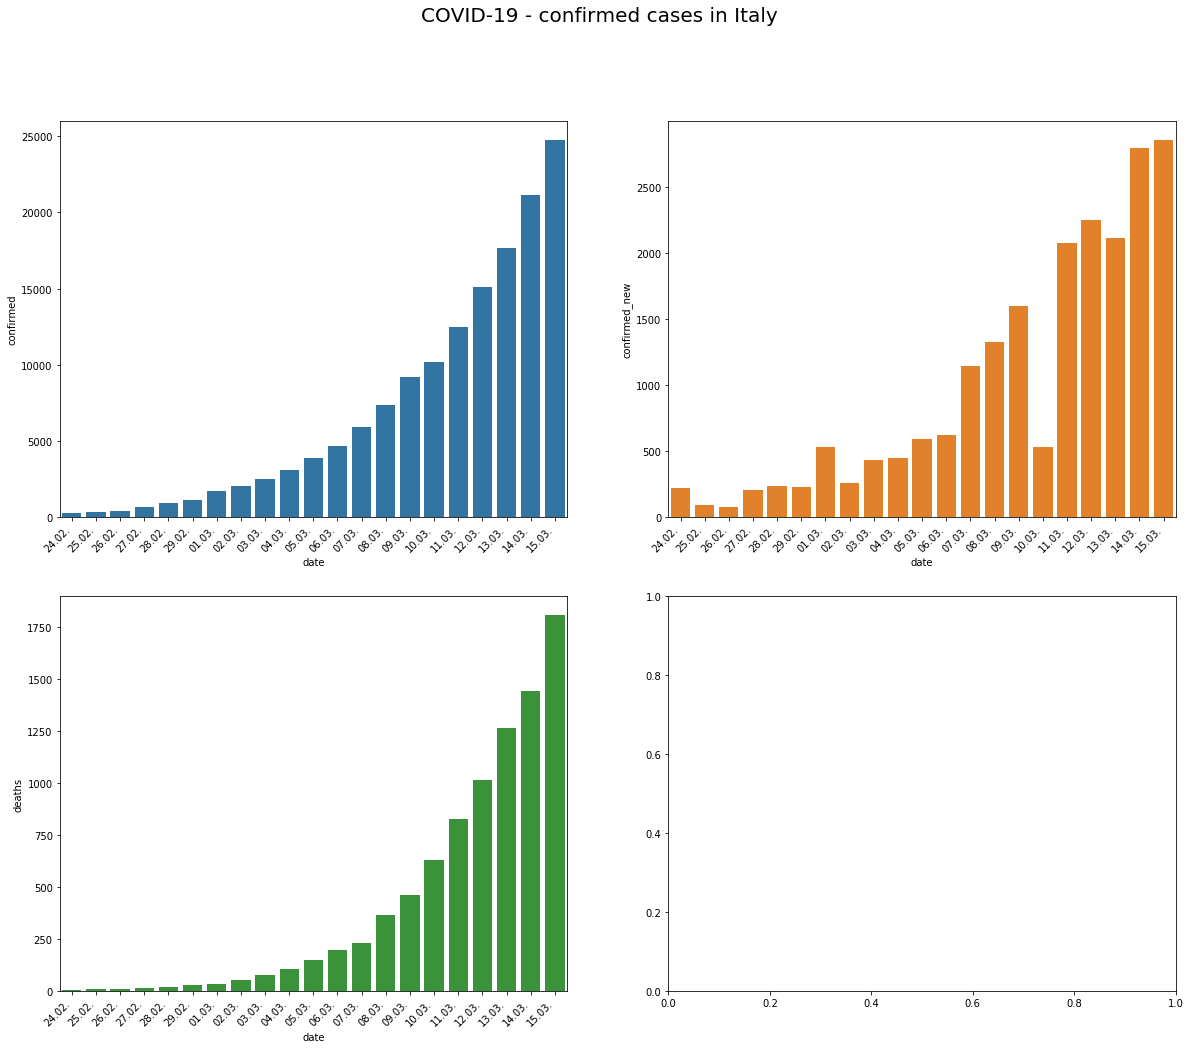

In [70]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
for i, ctype in enumerate(['confirmed', 'confirmed_new', 'deaths'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_italy, x=df_italy.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_italy.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
_ = plt.suptitle('COVID-19 - confirmed cases in Italy',fontsize=20)

